# Midterm Review

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
from scipy.special import comb
from scipy.stats import binom
from itertools import combinations
from numpy.random import rand

In [3]:
%config InlineBackend.figure_format = "retina"

## Question 1

In [4]:
A = np.array([
    [0, 1, 0, 1, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 0],
    [1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 1, 0]
])

# out-degree
A.sum(axis=0)

array([2, 3, 1, 2, 1, 1])

In [5]:
# in-degree
A.sum(axis=1)

array([2, 1, 2, 3, 1, 1])

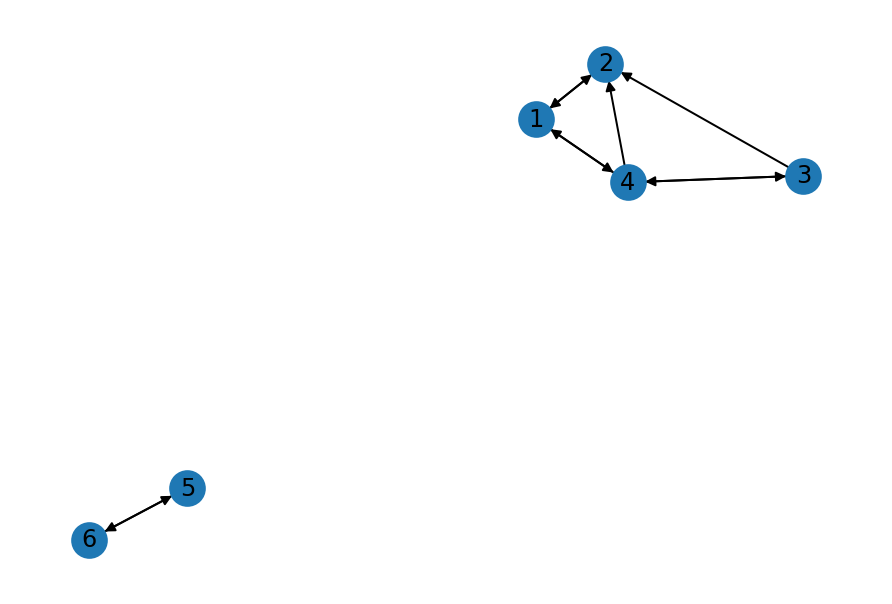

In [6]:
G = nx.DiGraph(A)
G = nx.relabel.relabel_nodes(G, {i: i+1 for i in range(6)})
nx.draw(G, with_labels=True)

In [17]:
H = np.array([
    [0, 1, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 0],
    [1, 1, 1, 0, 0, 0],
    [1, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 1, 0]
])

N, _ = H.shape

Gh = nx.DiGraph(H)
Gh = nx.relabel_nodes(Gh, {i: i+1 for i in range(6)})

In [24]:
DH = np.zeros((N, N))
for node, path in nx.all_pairs_shortest_path_length(Gh):
    for end_node, lenght in path.items():
        DH[node-1, end_node-1] = lenght
DH

array([[0., 1., 2., 1., 2., 1.],
       [1., 0., 3., 2., 3., 2.],
       [2., 1., 0., 1., 4., 3.],
       [1., 1., 1., 0., 3., 2.],
       [1., 2., 3., 2., 0., 1.],
       [2., 3., 4., 3., 1., 0.]])

In [27]:
DH.sum()

59.0

In [26]:
DH.sum(axis=1) / DH.sum()

array([0.11864407, 0.18644068, 0.18644068, 0.13559322, 0.15254237,
       0.22033898])

## Question 2

In [9]:
N = 6
p = 0.3

k = 4

In [10]:
binom.pmf(k, N, p)

0.05953499999999999

In [11]:
comb(N-1, k)

5.0

In [12]:
def Gb(N, p):
    links = [link for link in combinations(range(N), 2) if rand() > p]
    return links

In [13]:
n_rounds = 10_000

p_vec = np.zeros(n_rounds)
for n in range(n_rounds):
    G = nx.from_edgelist(Gb(N, p))
    pv = np.array(G.degree)[:, 1]
    pv = (pv == k).any()
    p_vec[n] = pv

In [14]:
G = nx.from_edgelist(Gb(N, p))
np.array(G.degree)[:, 1]

array([4, 5, 4, 5, 4, 4])

In [15]:
p_vec.mean()

0.9057